# Развитие игровой индустрии с 2000 по 2013 год

### Цели и задачи проекта

**Цель** — изучить развитие игровой индустрии с 2000 по 2013 год

**Задачи**:
- ознакомиться с данными и проверить их корректность;
- провести предобработку данных;
- отфильтровать данные в соответствии с целью проекта;
- провести категоризацию данных по оценкам пользователей и экспертов;
- проанализировать динамику продаж видеоигр по годам и регионам;
- определить ведущие платформы и распределение игр по ESRB-рейтингам;
- изучить динамику оценок критиков и пользователей и их связь с продажами;
- пределить жанры игр с наивысшими оценками пользователей и критиков.

### Описание данных
Данные `/datasets/new_games.csv` содержат информацию о продажах игр разных жанров и платформ, а также пользовательские и экспертные оценки игр:

`Name` — название игры.  
`Platform` — название платформы.  
`Year of Release` — год выпуска игры.  
`Genre` — жанр игры.  
`NA sales` — продажи в Северной Америке (в миллионах проданных копий).  
`EU sales` — продажи в Европе (в миллионах проданных копий).  
`JP sales` — продажи в Японии (в миллионах проданных копий).  
`Other sales` — продажи в других странах (в миллионах проданных копий).  
`Critic Score` — оценка критиков (от 0 до 100).  
`User Score` — оценка пользователей (от 0 до 10).  
`Rating` — рейтинг организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

### Содержимое проекта

1. [Загрузка данных и знакомство с ними](#загрузка)
2. [Проверка ошибок в данных и их предобработка](#проверка)  
    2.1. [Названия, или метки, столбцов датафрейма](#столбцы)  
    2.2. [Типы данных](#типы)  
    2.3. [Наличие пропусков в данных](#пропуски)  
    2.4. [Явные и неявные дубликаты в данных](#дубликаты)
3. [Исследование истории игр в начале XXI века](#фильтрация)
4. [Итоговый вывод](#вывод)

---

<a id='загрузка'></a>
## 1. Загрузка данных и знакомство с ними 

- Загрузим необходимые библиотеки Python и данные датасета `/datasets/new_games.csv`.


In [2]:
# Импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Защитимся от назойливых предупреждений
import warnings
warnings.simplefilter(action='ignore', category=Warning)

In [3]:
# Загружаем датасет new_games.csv
df = pd.read_csv('https://code.s3.yandex.net/datasets/new_games.csv')
# Посчитаем количество строк в исходном датафрейме для дальнейших вычислений
df_rows_count = df.shape[0]

- Познакомимся с данными: выведем первые строки и результат метода `info()`.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16956 entries, 0 to 16955
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16954 non-null  object 
 1   Platform         16956 non-null  object 
 2   Year of Release  16681 non-null  float64
 3   Genre            16954 non-null  object 
 4   NA sales         16956 non-null  float64
 5   EU sales         16956 non-null  object 
 6   JP sales         16956 non-null  object 
 7   Other sales      16956 non-null  float64
 8   Critic Score     8242 non-null   float64
 9   User Score       10152 non-null  object 
 10  Rating           10085 non-null  object 
dtypes: float64(4), object(7)
memory usage: 1.4+ MB


In [5]:
df.head()

,Name,Platform,Year of Release,Genre,NA sales,EU sales,JP sales,Other sales,Critic Score,User Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Датасет `new_games.csv` содержит 11 столбцов и 16956 строк.  

Количество и названия столбцов соответствуют описанию. Для более удобной работы с данными имеет смысл привести столбцы к стилю `snake case`.

---
<a id='проверка'></a>
## 2.  Проверка ошибок в данных и их предобработка

<a id='столбцы'></a>
### 2.1. Названия, или метки, столбцов датафрейма

In [6]:
# Выведем названия столбцов датафрейма
df.columns

Index(['Name', 'Platform', 'Year of Release', 'Genre', 'NA sales', 'EU sales',
       'JP sales', 'Other sales', 'Critic Score', 'User Score', 'Rating'],
      dtype='object')

In [7]:
# Переведем названия столбцов в формат snake case с помощью цикла
df.columns = df.columns.str.lower().str.replace(' ','_')

In [8]:
# Проверим правильность работы кода и выведем новые названия столбцов
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

<a id='типы'></a>
### 2.2. Типы данных
<a id='типы1'></a>
#### Изучим типы данных и их корректность:

In [9]:
df.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales            object
jp_sales            object
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

Всего в данных представлены переменные двух типов: 4 переменные типа `float64` и 7 переменных типа `object`.  

**Тип object** 
- `name`, `rating` — данные столбцы содержат строковые значения, поэтому корректно использовать тип `object`.
- `platform`, `genre` — эти столбцы имеют ограниченный набор значений, поэтому следует изменить тип данных на `category`.
- `eu_sales`, `jp_sales`, `user_score` — данные в этих столбцах содержат числовые значения (числа с плавающей точкой), поэтому тип `object` в данной ситуации некорректен, следует изменить тип данных на `float64`.

**Тип float64**
- `na_sales`, `other_sales`, `critic_score` — данные содержат числовые значения, поэтому корректно использовать тип `float64`.
- `year_of_release` — год является точным числом, поэтому тип данных в данном столбце следует заменить на `int64`.

Как было отмечено, часть столбцов имеет некорректный тип данных, проведем необходимые преобразования.

In [10]:
# Переведем столбцы eu_sales, jp_sales, user_score в тип float64
for column in ['eu_sales', 'jp_sales', 'user_score']:
    df[column] = pd.to_numeric(df[column], errors = 'coerce')

# Переведем тип данных столбца year_of_release в тип int64
df['year_of_release'] = pd.to_numeric(df['year_of_release'], errors = 'coerce')

# Переведем столбцы platform, genre в тип category
df[['platform', 'genre']] = df[['platform', 'genre']].astype('category')

In [11]:
# Проверим данные после преобразования типов данных
df.dtypes

name                 object
platform           category
year_of_release     float64
genre              category
na_sales            float64
eu_sales            float64
jp_sales            float64
other_sales         float64
critic_score        float64
user_score          float64
rating               object
dtype: object

<a id='пропуски'></a>
### 2.3. Наличие пропусков в данных

В этом разделе определим, в каких переменных встречаются пропуски, каково их количество и доля от всех значений.

In [12]:
# Выводим количество пропущенных строк в датафрейме
df.isna().sum()

name                  2
platform              0
year_of_release     275
genre                 2
na_sales              0
eu_sales              6
jp_sales              4
other_sales           0
critic_score       8714
user_score         9268
rating             6871
dtype: int64

In [13]:
# Подсчитываем процент строк с пропусками
df.isna().mean()*100

name                0.011795
platform            0.000000
year_of_release     1.621845
genre               0.011795
na_sales            0.000000
eu_sales            0.035386
jp_sales            0.023590
other_sales         0.000000
critic_score       51.391838
user_score         54.659118
rating             40.522529
dtype: float64

**В данных наблюдаются пропуски в следующих столбцах:**  
- `name` — в 2 (0.01% данных) строках отсутствует информация о названии игры. Поскольку количество пропусков ничтожно мало, строки с пропусками можно удалить.
- `year_of_release` — в 275 (1.62% данных) строках отсутствует информация о годе выпуска игры. Это может затруднить дальнейший анализ, в частности, фильтрацию данных по времени выхода игры. Поскольку невозможно предложить корректный способ по замене отсутствующих значений, строки с пропусками следует оставить без изменений или удалить.
- `genre` — в 2 (0.01% данных) строках отсутствует информация о жанре игры. Учитывая количество, это может быть связано с отсутствием информации о названии игры. Поскольку количество пропусков ничтожно мало, строки с пропусками можно удалить.
- `eu_sales` — в 6 (0.04% данных) строках отсутствует информация о продажах в Европе. Пропуски можно заполнить средним с группировкой по году и платформе.
- `jp_sales` — в 4 (0.02% данных) строках отсутствует информация о продажах в Японии. Пропуски можно заполнить средним с группировкой по году и платформе.
- `critic_score` — в 8714 (51.39% данных) строках отсутствует информация об оценке критиков. Это существенное количество, которое может серьезно затруднить категоризацию игр по оценкам критиков. Учитывая количество пропущенных значений, их необходимо заменить — чтобы не исказить имеющиеся данные, наиболее оптимальным способом представляется замена пропусков значениями-индикаторами.
- `user_score` — в 9268 (54.66% данных) строках отсутствует информация об оценке пользователей. Это существенное количество, которое может серьезно затруднить категоризацию игр по оценкам пользователей. Учитывая количество пропущенных значений, их необходимо заменить — чтобы не исказить имеющиеся данные, наиболее оптимальным способом представляется замена пропусков значениями-индикаторами.
- `rating` — в 6871 (40.52% данных) строках отсутствует информация о рейтинге организации ESRB. Это существенное количество, которое, однако, не повлияет на дальнейший анализ, т.к. эти данные не используются в данном исследовании. Следовательно, этот столбец можно будет удалить или заменить пропуски индикатором.

**Причины появления пропусков в данных**

- Можно предположить, что `отсутствие информации в столбцах name и genre` связано с потерей информации из-за раннего года выпуска игр. Нижная выгрузка подтверждает это, причем пропуски в этих строках связаны между собой и относятся к одним и тем же строкам.

In [14]:
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
661,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14439,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


- `Отсутствие данных о годе выпуска` может быть связано с ошибками ввода, когда информация известна, но ее не внесли в базу данных, или с отсутствием информации в связи с низкой популярностью игры.
- `Наличие пропусков в столбцах critic_score и user_score` может быть связано с действительным отсутствием рейтинга, например, по причине низкой популярности игр.
- `Отсутствие данных о рейтинге ESRB`, скорее всего, связано со страной происхождения игры, поскольку рейтинг ESRB присваивается только играм из США и Канады.
- Причиной `наличия пропусков в столбцах eu_sales и jp_sales` может быть непопулярность этих игр в странах Европы и в Японии соответственно.

**Обработка пропусков в данных**

In [15]:
# Удалим пропуски в столбцах name, genre, year_of_release
df = df.dropna(subset = ['name', 'genre', 'year_of_release'])

Поскольку выше было выдвинуто предположение о том, что отсутствие данных в столбцах `critic_score`, `user_score` и `rating` связано с действительным отсутствием таких рейтингов по некоторым играм, то было принято решение заменить пропущенные значения в этих столбцах на значения индикаторы, которые будут однозначно сообщать о пропусках.  
Переменные `critic_score` и `user_score` содержат числовые значения, поэтому в качестве значения-индикатора было выбрано значение `-1`.
`rating` содержит строковые значения, поэтому заменим пропуски на `no rating`.

In [16]:
# Заполним пропуски в столбцах critic_score и user_score
df['critic_score'] = df['critic_score'].fillna(-1)
df['user_score'] = df['user_score'].fillna(-1)

In [17]:
# Заполним пропуски в столбце rating
df['rating'] = df['rating'].fillna('no rating')

In [18]:
# Заполним пропуски в столбцах year_of_release и jp_sales средним с группировкой по году и платформе
avg_eu_sales = df.groupby(['year_of_release', 'platform'])['eu_sales'].transform('mean')
df['eu_sales'] = df['eu_sales'].fillna(avg_eu_sales)

avg_jp_sales = df.groupby(['year_of_release', 'platform'])['jp_sales'].transform('mean')
df['jp_sales'] = df['jp_sales'].fillna(avg_jp_sales)

In [19]:
# Проверим данные после обработки пропусков
df.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

In [20]:
df['year_of_release'] = df['year_of_release'].astype('int64')

<a id='дубликаты'></a>
### 2.4. Явные и неявные дубликаты в данных

- **Изучим данные на предмет неявных дубликатов**

In [21]:
# Рассмотрим уникальные значения в категориальной переменной genre
df['genre'].unique().tolist()

['Sports',
 'Platform',
 'Racing',
 'Role-Playing',
 'Puzzle',
 'Misc',
 'Shooter',
 'Simulation',
 'Action',
 'Fighting',
 'Adventure',
 'Strategy',
 'MISC',
 'ROLE-PLAYING',
 'RACING',
 'ACTION',
 'SHOOTER',
 'FIGHTING',
 'SPORTS',
 'PLATFORM',
 'ADVENTURE',
 'SIMULATION',
 'PUZZLE',
 'STRATEGY']

Можно заметить, что одни и те же категории записаны в разном регистре (например, `Adventure` и `ADVENTURE`). Поэтому имеет смысл перевести значения в нижний регистр для дальнейшей проверки данных на явные дубликаты.

In [22]:
# Приведем все значения к нижнему регистру, чтобы исключить неявные дубликаты
df['genre'] = df['genre'].str.lower()

In [23]:
# Рассмотрим уникальные значения в категориальной переменной platform
df['platform'].unique().tolist()

['Wii',
 'NES',
 'GB',
 'DS',
 'X360',
 'PS3',
 'PS2',
 'SNES',
 'GBA',
 'PS4',
 '3DS',
 'N64',
 'PS',
 'XB',
 'PC',
 '2600',
 'PSP',
 'XOne',
 'WiiU',
 'GC',
 'GEN',
 'DC',
 'PSV',
 'SAT',
 'SCD',
 'WS',
 'NG',
 'TG16',
 '3DO',
 'GG',
 'PCFX']

Повторов в названиях платформ не выявлено.
  

In [24]:
# Рассмотрим уникальные значения в категориальной переменной rating
df['rating'].unique()

array(['E', 'no rating', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

Для корректной оценки данных стоит ознакомиться с особенностями рейтинга ESRB, который отражает столбец `rating` https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board. Можно заметить, что в текущей версии рейтинга нет категории `K-A`, но она является более ранней версией категории `E`, поэтому для корректного анализа следует заменить значения `K-A` на `E`.

In [25]:
# Заменим значения K-A в столбце rating на E
df.loc[df['rating'] == 'K-A', 'rating'] = 'E'

In [26]:
# Так как названия для одних и тех же игр могут быть записаны по-разному, приведем все значения в переменной name к нижнему регистру
# Это позволит обнаружить больше полных дубликатов
df['name'] = df['name'].str.lower()

- **Изучим данные на предмет явных дубликатов**

In [27]:
# Определим количество повторяющихся строк
df.duplicated().sum()

235

In [28]:
# Удалим дубликаты
df = df.drop_duplicates()


Было обнаружено `235` явных дубликатов — идентичных строк. Все дублирующиеся строки были удалены методом `drop_duplicates`.

Также среди значений переменной `genre` были обнаружены дубликаты, связанные с различным регистром написания. Для исправления этой проблемы все значения были переведены в нижний регистр. Аналогично — с переменной `name`.

- **Расчет удаленных значений**

In [29]:
# Кол-во строк в датафрейме после преобразований
df_rows_count_result = df.shape[0]
# Количество удаленных строк
deleted_rows = df_rows_count - df_rows_count_result
# Доля удаленных строк от исходного кол-ва строк в датафрейме
deleted_rows_share = round(deleted_rows/df_rows_count, 2)

print(f'Количество удаленных строк = {deleted_rows}',
f'Доля удаленных строк от исходного кол-ва строк в датафрейме = {deleted_rows_share}',
sep = '\n')

Количество удаленных строк = 512
Доля удаленных строк от исходного кол-ва строк в датафрейме = 0.03


- **Вывод по результатам предобработки данных**

В процессе предобработки данных были проведены следующие преобразования:
- Приведение названий столбцов в соответствие со стилем `snake case`.
- Удаление пропущенных значений в столбцах `name`, `genre`, `year_of_release`;
- Замена пропущенных значений индикатором в столбцах `critic_score`, `user_score`, `rating`;
- Заполнение пропусков средним с группировкой по году и платформе в столбцах `eu_sales` и `jp_sales`;
- Изменение типов данных переменных: `platform`, `genre` (с `object` на `category`), `eu_sales`, `jp_sales`, `user_score` (с `object` на `float64`), `year_of_release` (с `float64` на `int64`);
- Обработка неявных дубликатов в столбце `genre`;
- Удаление `235` повторяющихся строк (явных дубликатов);
  
Всего было удалено `512` строк, что составляет `3%` от всего объема исходных данных.

---
<a id='фильтрация'></a>
## 3. Исследование истории продаж игр в начале XXI века

**Цель** — изучить развитие игровой индустрии с 2000 по 2013 год

### 3.1. Фильтрация и категоризация данных

In [30]:
# Отберем данные за 2000-2013 гг. и создадим новый датафрейм
df_actual = df[(df['year_of_release'] >= 2000) & (df['year_of_release'] <= 2013)]


    
- Разделим все игры по оценкам пользователей и выделим такие категории: высокая оценка (от 8 до 10 включительно), средняя оценка (от 3 до 8, не включая правую границу интервала) и низкая оценка (от 0 до 3, не включая правую границу интервала).

In [31]:
df_actual.loc[:, 'user_rating'] = pd.cut(df_actual['user_score'], bins = [0, 3, 8, 11], right = False,
                                  labels = ['низкая оценка', 'средняя оценка', 'высокая оценка'])

- Разделим все игры по оценкам критиков и выделим такие категории: высокая оценка (от 80 до 100 включительно), средняя оценка (от 30 до 80, не включая правую границу интервала) и низкая оценка (от 0 до 30, не включая правую границу интервала).

In [32]:
df_actual.loc[:, 'critic_rating'] = pd.cut(df_actual['critic_score'], bins = [0, 30, 80, 101], right = False, 
                                  labels = ['низкая оценка', 'средняя оценка', 'высокая оценка'])

- Проверим результат: сгруппируем данные по выделенным категориям и посчитаем количество игр в каждой категории.

In [33]:
# Посчитаем количество игр в каждой категории рейтинга пользователей
df_actual.groupby('user_rating')['name'].count()

user_rating
низкая оценка      116
средняя оценка    4081
высокая оценка    2286
Name: name, dtype: int64

In [34]:
# Посчитаем количество игр в каждой категории рейтинга критиков
df_actual.groupby('critic_rating')['name'].count()

critic_rating
низкая оценка       55
средняя оценка    5422
высокая оценка    1692
Name: name, dtype: int64

### 3.2. Динамика развития рынка

#### Общая динамика продаж по годам

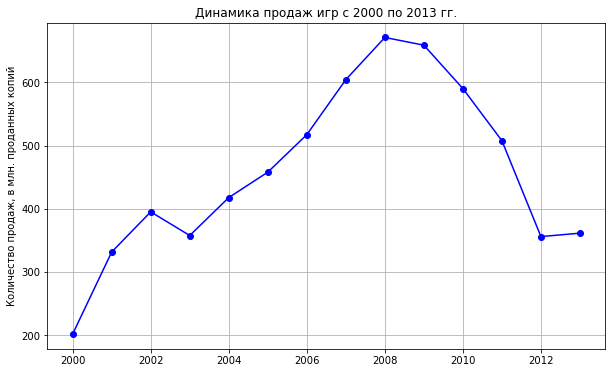

In [35]:
# Просуммируем значения продаж из разных регионов и сгруппируем данные по годам
year_sales = df_actual.groupby('year_of_release')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum().sum(axis=1)

# Построим линейную диаграмму для демонстрации динамики продаж по всем регионам
year_sales.plot(kind = 'line',
                figsize =(10, 6), 
                xlabel = '',
                ylabel = 'Количество продаж, в млн. проданных копий',
                title = 'Динамика продаж игр с 2000 по 2013 гг.',
                marker = 'o',
                grid = True,
                color = 'blue')

plt.show()

#### Динамика продаж по регионам

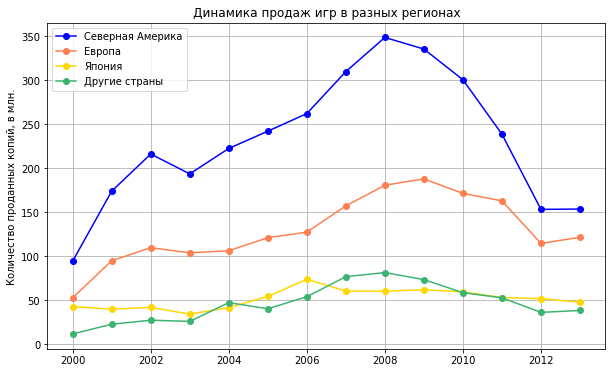

In [36]:
# Сгруппируем значения продаж в разных регионах по годам
year_sales_regions = df_actual.groupby('year_of_release')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()

# Заменим названия столбцов на более понятные
year_sales_regions.columns = ['Северная Америка', 'Европа', 'Япония', 'Другие страны']

# Построим линейную диаграмму для демонстрации динамики продаж в разных регионах
year_sales_regions.plot(kind = 'line',
                figsize = (10, 6), 
                xlabel = '',
                ylabel = 'Количество проданных копий, в млн.',
                title = 'Динамика продаж игр в разных регионах',
                marker = 'o',
                grid = True,
                color = ['blue', 'coral', 'gold', 'mediumseagreen'])

plt.show()

**Общая динамика продаж игр**   
С начала 2000-х рынок видеоигр демонстрировал **устойчивый рост**. Продажи увеличивались вплоть до **пика в 2008 году** (671 млн копий). Далее началось постепенное **снижение интереса** или насыщение рынка: к 2013 году продажи сократились почти на 50% от максимального значения. Можно предположить, что падению спроса на видеоигры способствовал рост конкуренции с мобильным сегментом игр.

**При анализе региональной динамики наблюдается:**
- Северная Америка — самый крупный рынок: уверенный рост до 2008 г., далее — снижение. В пике (2008) продажи достигли почти 350 млн копий.
- Европа — второй по величине рынок, демонстрирует схожий тренд с Северной Америкой, однако рост более плавный.
- Япония — рынок видеоигр в стране значительно меньше по объёму. При этом наблюдается плавный рост до 2006 г., а затем — плавное снижение.
- Другие страны (остальной мир) — также демонстрируют схожие тенденции с Европой и Северной Америкой, однако этот рынок значительно меньше по количеству проданных игр и отражают плавный последовательный рост до 2008 и также дальнейшее снижение показателей.

В целом, можно заключить, что основной вклад в рост рынка в 2000-х вносили Северная Америка и Европа. При этом наблюдались схожие тенденции во всех регионах — после 2009 г. наблюдается общемировое падение продаж, особенно ощутимое в Японии и Северной Америке.

### 3.3. Платформы и рейтинги

#### Топ-10 платформ по количеству игр, выпущенных за весь актуальный период

In [90]:
# Посчитаем количество игр, выпущенных на каждой платформе
platform_games_count = df_actual.groupby('platform')['name'].count().reset_index(name = 'games')

# Отсортируем данные в порядке убывания и оставим 10 платформ с наибольшим количеством выпущенных игр
platform_games_top = platform_games_count.sort_values(by = 'games', ascending = False).head(10)

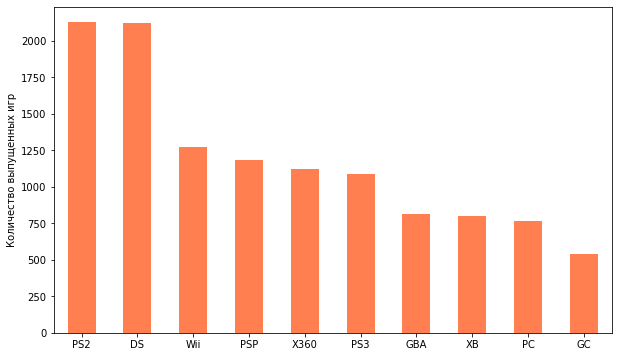

In [91]:
# Построим столбчатую диаграмму для демонстрации топ-10 платформ по количеству проданных игр
platform_games_top.plot(kind = 'bar', 
                        x = 'platform', 
                        y = 'games',
                        legend = False, 
                        figsize = (10, 6), 
                        rot = 0, 
                        color = 'coral',
                        xlabel = '',
                        ylabel = 'Количество выпущенных игр')
plt.show()

**Наибольшее количество игр** за рассматриваемый период было выпущено на платформах **PS2 и Nintendo DS** — более 2100 игр на каждой. Эти две платформы значительно опережают остальные по объёму контента, что говорит об их высокой популярности среди разработчиков и пользователей в те годы.  

На третьем месте — Nintendo Wii (1275 игр), за ним следуют портативная PSP и консоль Xbox 360, каждая из которых превысила отметку в 1000 игр. Также в десятку вошли PS3, GBA, оригинальный Xbox, ПК, а замыкает список GameCube.

#### ESRB-рейтинг и активность выпуска игр

In [39]:
# Определим количество выпущенных игр каждого ESRB-рейтинга
rating_games = df_actual.groupby('rating')['name'].count().sort_values(ascending = False).reset_index(name = 'games_count')

In [40]:
# Определим количество проданных копий игр каждого ESRB-рейтинга
rating_sales = df_actual.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum().sum(axis=1).sort_values(ascending = False).reset_index(name = 'sales_count').round(2)

In [109]:
# Объединим таблицы rating_games и rating_sales
rating_df = pd.merge(rating_games, rating_sales)
rating_df

,rating,games_count,sales_count
0,no rating,4058,1141.66
1,E,3662,2225.25
2,T,2588,1282.66
3,M,1256,1204.61
4,E10+,1207,569.27
5,EC,8,1.75
6,AO,1,1.96
7,RP,1,0.04


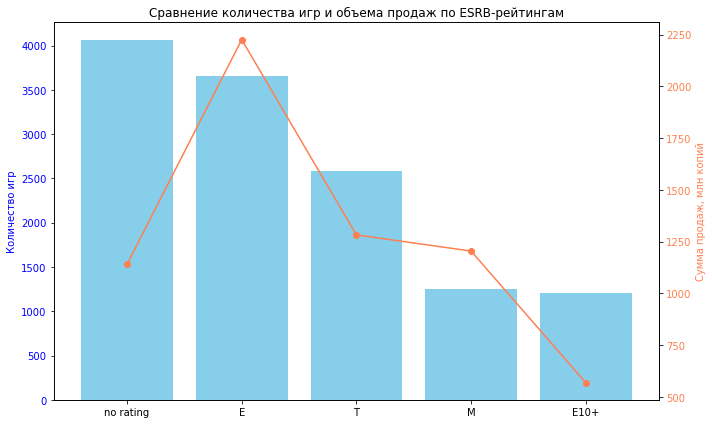

In [111]:
# Построим диаграмму для сравнения количества игр и объема продаж по ESRB-рейтингам
fig, ax1 = plt.subplots(figsize=(10, 6))

rating_df_top = rating_df.head()
x = rating_df_top['rating']
games = rating_df_top['games_count']
sales = rating_df_top['sales_count']

# Столбцы — количество игр
ax1.bar(x, games, color='skyblue', label='Количество игр')
ax1.set_ylabel('Количество игр', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Линия — продажи
ax2 = ax1.twinx()
ax2.plot(x, sales, color='coral', marker='o', label='Сумма продаж')
ax2.set_ylabel('Сумма продаж, млн копий', color='coral')
ax2.tick_params(axis='y', labelcolor='coral')

plt.title('Сравнение количества игр и объема продаж по ESRB-рейтингам')
fig.tight_layout()
plt.show()

Наиболее популярные рейтинги по количеству выпущенных игр — это:  
- no rating (без указания рейтинга) — более 4000 игр,
- E (Everyone) — свыше 3600 игр,
- T (Teen) — около 2600 игр.

Лидером по продажам является рейтинг E — игры с таким возрастным ограничением продались на сумму более 2,2 млрд копий. Это говорит о высоком спросе на продукты, ориентированные на широкую аудиторию.

Рейтинг M (Mature), несмотря на меньшее количество выпущенных игр, показывает высокий уровень продаж: при 1256 играх продажи составили более 1,2 млрд, что говорит о коммерческом успехе игр для взрослых.

Игры без рейтинга (no rating) составляют наибольшую долю по количеству, но по объёму продаж они уступают всем основным категориям, что может указывать на менее популярные или нишевые проекты (например, японские релизы или устаревшие платформы).

Игры с рейтингом EC, AO, RP почти не представлены на рынке — это единичные случаи, которые не повлияли на общую картину.

### 3.4. Оценки критиков и пользователей
#### Динамика средних оценок пользователей и критиков с 2000 по 2013 гг.

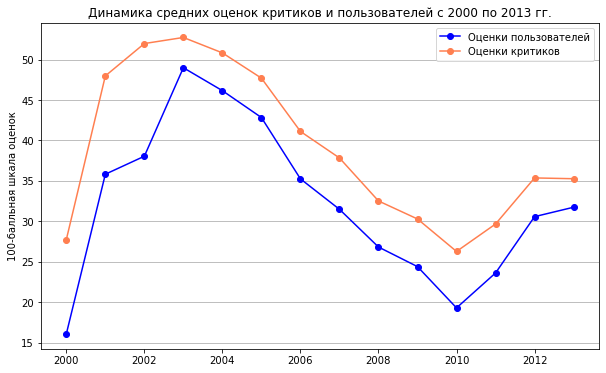

In [113]:
# Приведем оценки пользователей и критиков к единому масштабу 
df_actual['user_score_x10'] = df_actual['user_score']*10 #переведем шкалу пользовательских оценок из 10-балльной в 100-балльную

# Сгруппируем средние оценки критиков и пользователей по годам
mean_score = df_actual.groupby('year_of_release')[['user_score_x10', 'critic_score']].mean()

# Построим линейную диаграмму для сравнения пользовательских и экспертных оценок
mean_score.plot(kind = 'line',
                figsize = (10, 6),
                title = 'Динамика средних оценок критиков и пользователей с 2000 по 2013 гг.',
                xlabel = '',
                ylabel = '100-балльная шкала оценок',
                legend = True,
                marker = 'o',
                color = ['blue', 'coral'])

# Поменяем названия в легенде на более понятные
plt.legend(['Оценки пользователей', 'Оценки критиков'])
plt.grid(True, axis = 'y')
plt.show()

С 2000 по 2003 год наблюдается стремительный рост средних оценок: у пользователей — с 16.1 до 49, у критиков — с 27.7 до 52.7. Это — пик исследуемого периода.

Начиная с 2004 года, оценки обеих сторон начали стабильно снижаться, достигнув минимума в 2010 году (у пользователей — 19.3, у критиков — 26.3). Затем с 2011 по 2013 год виден небольшой рост.

В целом, критики в среднем оценивают игры выше, чем пользователи, но общая динамика идентична. Падение оценок может отражать насыщение рынка или рост требований аудитории. После 2010 года начинается умеренное восстановление интереса и, вероятно, качества игр.

#### Связь между оценками и продажами в разных регионах

In [44]:
user_sales = df_actual.groupby('user_rating')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].mean()

In [45]:
critic_sales = df_actual.groupby('critic_rating')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].mean()

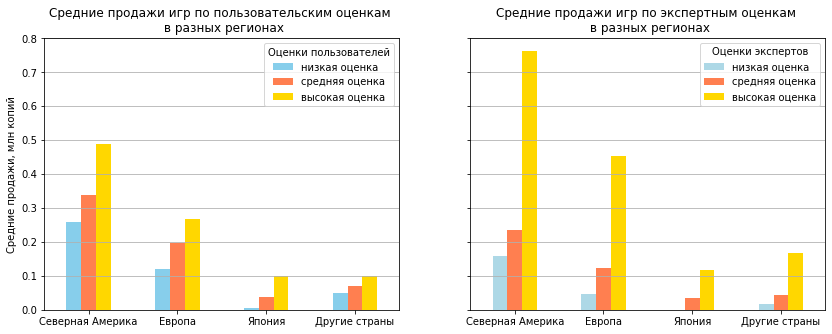

In [47]:
fig, axes = plt.subplots(1, 2, figsize = (14, 5), sharey = True)

# Диаграмма по оценкам пользователей
user_sales.columns = ['Северная Америка', 'Европа', 'Япония', 'Другие страны']
user_sales.T.plot(kind = 'bar',
                  ax = axes[0],
                  title = 'Средние продажи игр по пользовательским оценкам \n в разных регионах',
                  ylabel = 'Средние продажи, млн копий',
                  legend = True,
                  rot = 0,
                  color = ['skyblue', 'coral', 'gold'])

axes[0].grid(True, axis='y')
axes[0].legend(title = 'Оценки пользователей')

# Диаграмма по оценкам экспертов
critic_sales.columns = ['Северная Америка', 'Европа', 'Япония', 'Другие страны']
critic_sales.T.plot(kind = 'bar',
                  ax = axes[1],
                  title = 'Средние продажи игр по экспертным оценкам \n в разных регионах',
                  ylabel = 'Средние продажи, млн копий',
                  legend = True,
                  rot = 0,
                  color = ['lightblue', 'coral', 'gold'])

axes[1].grid(True, axis='y')
axes[1].legend(title = 'Оценки экспертов')

plt.show()

Игры с `высокой пользовательской оценкой` в среднем `продаются лучше` во всех регионах.  
Особенно заметна разница в Японии: средние продажи игр с высокой оценкой там в 22 раза выше, чем у игр с низкой оценкой (0.098 млн против 0.004 млн копий). В Северной Америке, Европе и других регионах игры с высокой оценкой также опережают по продажам, но разница составляет примерно в 2 раза.

Что касается оценок критиков, то здесь различия еще более выражены:
 - В Северной Америке игры с высокой оценкой критиков продаются в 4.8 раза лучше, чем игры со средней оценкой (0.76 млн против 0.23 млн).
 - В Европе — почти в 3.7 раза лучше.
 - В остальных регионах наблюдается аналогичная картина.

Это может свидетельствовать о том, что `экспертные оценки особенно сильно влияют на решение о покупке`. Пользователи ориентируются на мнение критиков, считая их авторитетными источниками. При этом уже после покупки пользовательская оценка может быть ниже, но на объем продаж это не влияет.

### 3.5. Жанры игр

**Топ жанров по средним оценкам пользователей и экспертов**

In [48]:
# Посчитаем средние оценки пользователей по жанрам
user_score_genres = df_actual.groupby('genre', as_index=False)['user_score_x10'].mean()

# Посчитаем средние оценки экспертов по жанрам
critic_score_genres = df_actual.groupby('genre', as_index=False)['critic_score'].mean()

# Объдиним два датафрейма
mean_scores_genres = pd.merge(user_score_genres, critic_score_genres, how = 'inner', on = 'genre')
mean_scores_genres.sort_values(ascending = False, by = 'user_score_x10')

,genre,user_score_x10,critic_score
8,shooter,54.195804,57.337662
2,fighting,40.005172,42.920690
7,role-playing,38.929564,40.489342
0,action,38.879675,42.790244
6,racing,37.592133,46.299172
4,platform,37.485337,44.838710
11,strategy,34.397661,37.538012
10,sports,32.821782,42.309131
9,simulation,24.802486,29.338398
5,puzzle,10.724731,30.255914


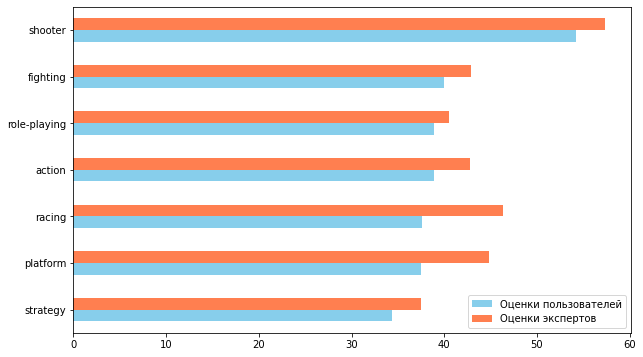

In [49]:
# Построим диаграмму для демонстрации пользовательских и экспертных оценок игр разных жанров
mean_scores_genres.sort_values(by = 'user_score_x10').tail(7).plot(kind = 'barh',
                                                                   x = 'genre',
                                                                   figsize = (10, 6),
                                                                   color = ['skyblue', 'coral'],
                                                                   xlabel = '',
                                                                   ylabel = 'Средние оценки, в 100-балльной шкале')
plt.legend(['Оценки пользователей', 'Оценки экспертов'])

plt.show()

Наиболее высоко оценённый жанр у обеих групп — `Shooter` (средняя оценка пользователей — 54.2, критиков — 57.3). Он стабильно лидирует.

В топ-5 также входят:
— у пользователей: Fighting, Role-playing, Action, Racing
— у критиков: Racing, Platform, Fighting, Action

Жанры Adventure, Puzzle, Misc, Simulation и Strategy получают наименьшие оценки. Особенно низко их оценивают пользователи — зачастую в 2–3 раза ниже, чем критики.

Критики в целом ставят более ровные и высокие оценки, особенно технически сложным жанрам (Racing, Platform).  
Пользователи более эмоциональны: предпочитают динамичные жанры (Shooter, Fighting), игнорируя нишевые.  
Наименее популярные по оценкам — Adventure и Misc, что может указывать на слабую проработку или узкую аудиторию.

---
<a id='вывод'></a>
## 4. Итоговый вывод

В рамках проекта была проделана работа по предобработке данных, категоризации и фильтрации, а также был проведен анализ развития игровой индустрии с 2000 по 2013 год. 

- В рамках `предобработки данных` были удалены пропущенные значения в некоторых столбцах, часть значений была заменена значениями-индикаторами. Кроме того, для части переменных типы данных были заменены на другие, более соответствующие имеющимся данным. Также были обработаны как неявные, так и явные дубликаты. В результате было удалено 512 строк, что составило 3% от всего объема исходных данных.


- Для изучения истории продаж игр в начале XXI века были отфильтрованы данные за период с 2000 по 2013 год включительно, эти данные сформировали новый датасет `df_actual`.


- В датасет `df_actual` было добавлено 2 новых столбцах, сформированных на основе категоризации:
   - `user_rating` — на основе оценок пользователей (столбец `user_score`) были выделены следующие категории: высокая оценка (от 8 до 10 включительно), средняя оценка (от 3 до 8, не включая правую границу интервала) и низкая оценка (от 0 до 3, не включая правую границу интервала).
   -  `critic_rating` — на основе оценок пользователей (столбец `critic_score`) были выделены следующие категории: высокая оценка (от 80 до 100 включительно), средняя оценка (от 30 до 80, не включая правую границу интервала) и низкая оценка (от 0 до 30, не включая правую границу интервала).

**В результате исследования развития игровой индустрии с 2000 по 2013 гг. были сделаны следующие выводы:**

- Рынок видеоигр рос до 2008 года, достигнув пика продаж в 671 млн копий. После этого начался стабильный спад, возможно из-за насыщения рынка и роста конкуренции со стороны мобильных игр.  


- Северная Америка и Европа — ключевые регионы, определяющие объем мировых продаж. Япония и другие страны показывали схожую динамику, но в меньших масштабах.


- Наибольшее количество игр было выпущено на платформах PS2 и Nintendo DS — свыше 2100 игр каждая. В десятку также вошли Wii, PSP, Xbox 360, PS3, GBA, ПК и другие популярные платформы тех лет.


- Самыми распространёнными ESRB-рейтингами были:  
  - E (Everyone) (3662 игр),
  - T (Teen) (2588 игр),
  - No rating (4058 игр, представленных в базе, не имели данных о рейтинге).

При этом лидер по продажам — рейтинг E, ориентированный на широкую аудиторию. Игры с рейтингом M (Mature) при меньшем количестве демонстрируют сопоставимо высокие продажи.


- Оценки пользователей и критиков достигли максимума в 2003 году, после чего началось их снижение. У критиков оценки стабильно выше, но общая тенденция одинаковая — падение до 2010 года и лёгкий рост после.


- Оценки влияют на продажи:
  - Игры с высокими оценками продаются лучше — особенно в Японии и в Северной Америке.
  - Экспертные мнения оказывают более заметное влияние на решения о покупке.


- Жанр Shooter — самый высоко оценённый как пользователями, так и критиками.
  - Пользователи предпочитают динамичные жанры (Fighting, Role-playing).
  - Критики выше оценивают технически сложные (Racing, Platform).
  - Adventure и Puzzle — наименее любимые пользователями жанры.